In [29]:
import numpy as np
from matplotlib import pyplot as plt

In [30]:
def grad(w):
    w1, w2 = w
    return np.array([26 * w1 - 10 * w2 + 4, -10 * w1 + 4 * w2 - 2])

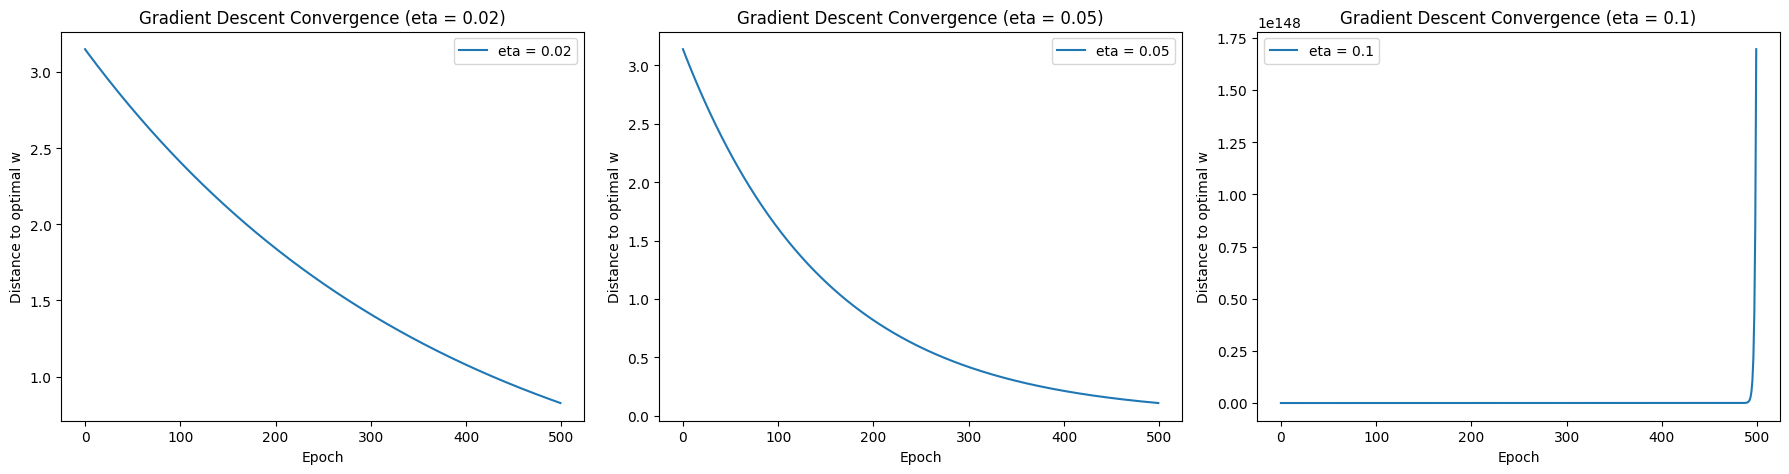

In [31]:
w_init = np.array([0.0, 0.0])
optimal_w = np.array([1.0, 3.0])
epochs = 500

def gradient_descent(w_init, eta, epochs):
    w = w_init.copy()
    distances = []
    for _ in range(epochs):
        w -= eta * grad(w)
        distance = np.linalg.norm(w - optimal_w)
        distances.append(distance)
    return distances

etas = [0.02, 0.05, 0.1]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, eta in zip(axes, etas):
    distances = gradient_descent(w_init, eta, epochs)
    ax.plot(distances, label=f'eta = {eta}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Distance to optimal w')
    ax.set_title(f'Gradient Descent Convergence (eta = {eta})')
    ax.legend()

plt.tight_layout()
plt.show()

/var/folders/_v/q6j8tl0d2cb93y5h0_d24pgr0000gn/T/ipykernel_12427/2961271910.py:3: RuntimeWarning: overflow encountered in double_scalars
  return np.array([26 * w1 - 10 * w2 + 4, -10 * w1 + 4 * w2 - 2])
/var/folders/_v/q6j8tl0d2cb93y5h0_d24pgr0000gn/T/ipykernel_12427/3094989907.py:9: RuntimeWarning: invalid value encountered in subtract
  w -= eta * grad(w)


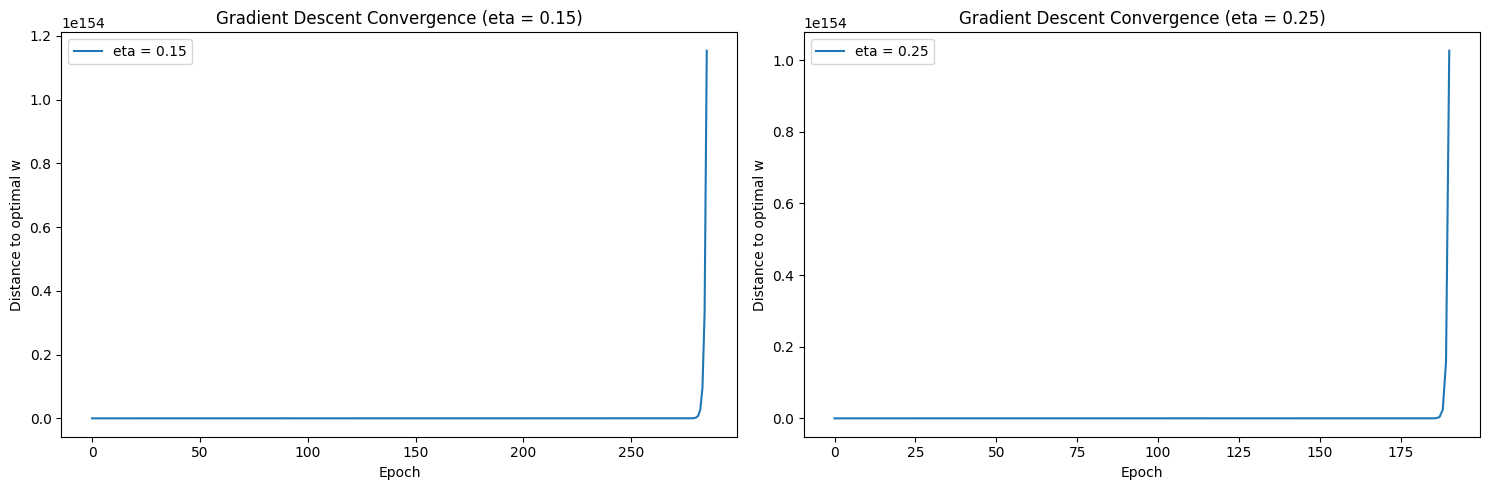

In [32]:
new_etas = [0.15, 0.25]

fig, axes = plt.subplots(1, len(new_etas), figsize=(15, 5))

for ax, eta in zip(axes, new_etas):
    distances = gradient_descent(w_init, eta, epochs)
    ax.plot(distances, label=f'eta = {eta}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Distance to optimal w')
    ax.set_title(f'Gradient Descent Convergence (eta = {eta})')
    ax.legend()

plt.tight_layout()
plt.show()

In [33]:
def sigmoid(x, alpha=5):
    return 1 / (1 + np.exp(-alpha * x))

def sigmoid_derivative(x, alpha=5):
    sig = sigmoid(x, alpha)
    return alpha * sig * (1 - sig)

In [34]:
W = np.array([
    [1, -1],
    [-1, -1],
    [0, -1]
])
b = np.array([1, 1, -1])
U = np.array([1, 1, -1]).T
c = np.array([-3/2])

def forward_NN(x):
    Vz = W @ x + b
    z = sigmoid(Vz)

    Vf = U @ z + c
    f = sigmoid(Vf)

    return f[0]

In [35]:
def backward_NN(x, y):
    Vz = W @ x + b
    z = sigmoid(Vz)

    Vf = U @ z + c
    f = sigmoid(Vf)

    dVf = 2 * (f - y) * sigmoid_derivative(Vf)
    dU = np.outer(dVf, z)
    dc = dVf

    dVz = (np.expand_dims(U.T, axis=1) @ np.expand_dims(dVf, axis=0)).flatten() * sigmoid_derivative(Vz)
    dW = np.outer(dVz, x)
    db = dVz

    return [dW, db, dU.flatten(), dc]

In [36]:
def full_NN(x, y):
    return [forward_NN(x)] + backward_NN(x, y)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
dW, db, dU, dc = backward_NN(np.array([1, 0]), 1)
print(dW.shape, db.shape, dU.shape, dc.shape)

(3, 2) (3,) (3,) (1,)


In [37]:
W1 = np.array([
    [1, -1],
    [-1, -1],
    [0, -1]
])
b1 = np.array([1, 1, -1])
W2 = np.array([1, 1, -1])
b2 = -1.5
step = np.vectorize(lambda x: 1 if x >= 0 else 0)

def run_old_nn(X):
    res = list()
    for vec in X:
        res.append(step(W2 @ step(W1 @ vec + b1) + b2))
    return np.array(res)

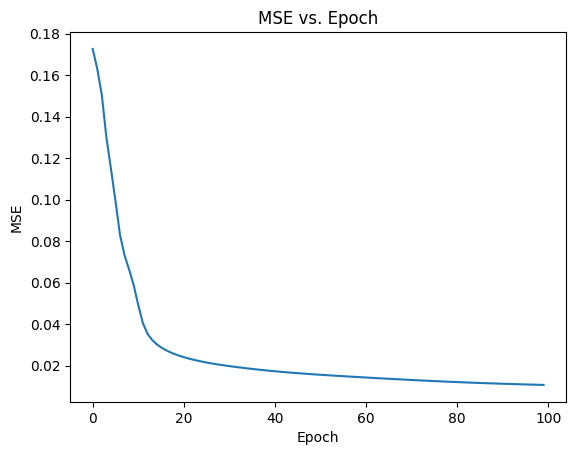

In [38]:
np.random.seed(42)
W = np.random.normal(0, 0.1, W.shape)
b = np.random.normal(0, 0.1, b.shape)
U = np.random.normal(0, 0.1, U.shape)
c = np.random.normal(0, 0.1, c.shape)

eta = 0.01
epochs = 100
num_data_points = 1000

X = np.random.uniform(-2, 2, size=(1000, 2))
Y = y = run_old_nn(X)

mse_list = []

for epoch in range(epochs):
    for i in range(num_data_points):
        x = X[i]
        y = Y[i]
        
        f, dW, db, dU, dc = full_NN(x, y)

        W -= eta * dW
        b -= eta * db
        U -= eta * dU
        c -= eta * dc
    
    y_preds = np.array([forward_NN(x) for x in X])
    mse_epoch = mse(Y, y_preds)
    mse_list.append(mse_epoch)

plt.plot(range(epochs), mse_list)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Epoch')
plt.show()

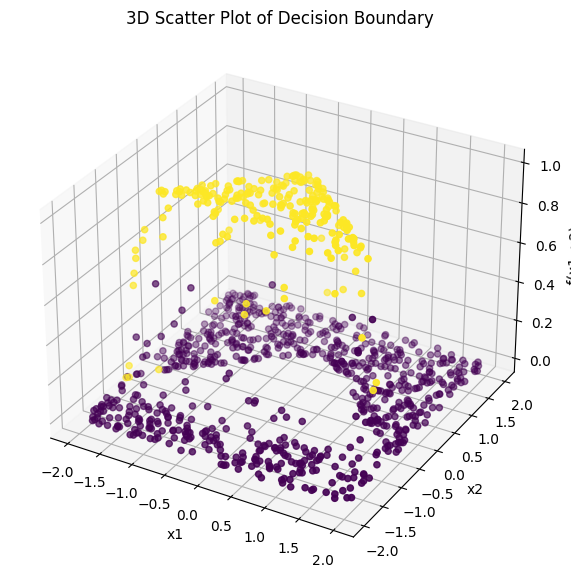

In [39]:
x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
f_grid = np.zeros_like(x1_grid)

for i in range(x1_grid.shape[0]):
    for j in range(x1_grid.shape[1]):
        x_point = np.array([x1_grid[i, j], x2_grid[i, j]])
        f_grid[i, j] = forward_NN(x_point)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], [forward_NN(np.array([X[i, 0], X[i, 1]])) for i in range(len(X))], c=Y, cmap='viridis', marker='o')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('3D Scatter Plot of Decision Boundary')

plt.show()

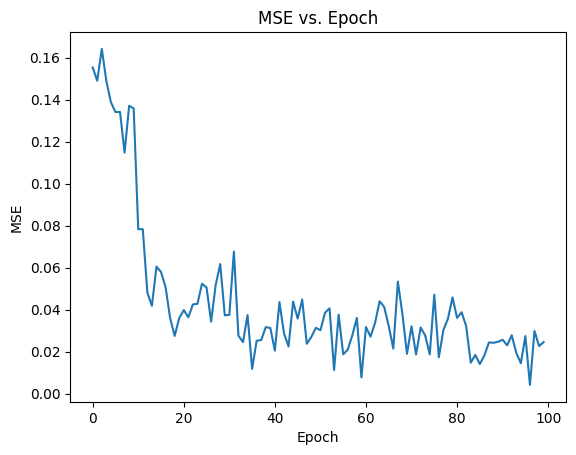

In [40]:
np.random.seed(42)
W = np.random.normal(0, 0.1, W.shape)
b = np.random.normal(0, 0.1, b.shape)
U = np.random.normal(0, 0.1, U.shape)
c = np.random.normal(0, 0.1, c.shape)

eta = 0.1
epochs = 100
num_data_points = 1000

X = np.random.uniform(-2, 2, size=(1000, 2))
Y = y = run_old_nn(X)

mse_list = []

for epoch in range(epochs):
    for i in range(num_data_points):
        x = X[i]
        y = Y[i]
        
        f, dW, db, dU, dc = full_NN(x, y)

        W -= eta * dW
        b -= eta * db
        U -= eta * dU
        c -= eta * dc
    
    y_preds = np.array([forward_NN(x) for x in X])
    mse_epoch = mse(Y, y_preds)
    mse_list.append(mse_epoch)

plt.plot(range(epochs), mse_list)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Epoch')
plt.show()

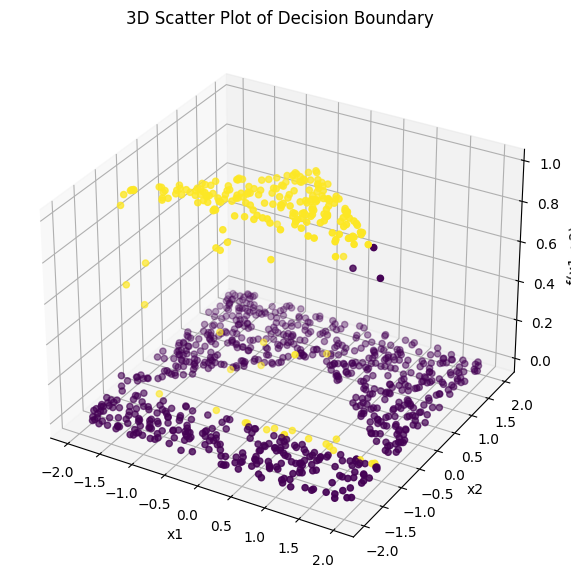

In [41]:
x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
f_grid = np.zeros_like(x1_grid)

for i in range(x1_grid.shape[0]):
    for j in range(x1_grid.shape[1]):
        x_point = np.array([x1_grid[i, j], x2_grid[i, j]])
        f_grid[i, j] = forward_NN(x_point)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], [forward_NN(np.array([X[i, 0], X[i, 1]])) for i in range(len(X))], c=Y, cmap='viridis', marker='o')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('3D Scatter Plot of Decision Boundary')

plt.show()

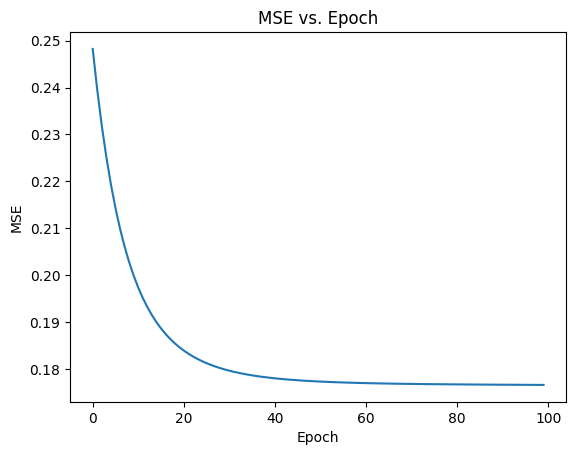

In [42]:
np.random.seed(42)
W = np.random.normal(0, 0.1, W.shape)
b = np.random.normal(0, 0.1, b.shape)
U = np.random.normal(0, 0.1, U.shape)
c = np.random.normal(0, 0.1, c.shape)

eta = 0.01
epochs = 100
num_data_points = 1000

X = np.random.uniform(-2, 2, size=(1000, 2))
Y = y = run_old_nn(X)

mse_list = []

for epoch in range(epochs):
    W_grad = np.zeros_like(W)
    b_grad = np.zeros_like(b)
    U_grad = np.zeros_like(U)
    c_grad = np.zeros_like(c)
    for i in range(num_data_points):
        x = X[i]
        y = Y[i]
        
        f, dW, db, dU, dc = full_NN(x, y)

        W_grad += dW 
        b_grad += db 
        U_grad += dU 
        c_grad += dc 

    W -= eta * W_grad / num_data_points
    b -= eta * b_grad / num_data_points
    U -= eta * U_grad / num_data_points
    c -= eta * c_grad / num_data_points
    
    y_preds = np.array([forward_NN(x) for x in X])
    mse_epoch = mse(Y, y_preds)
    mse_list.append(mse_epoch)

plt.plot(range(epochs), mse_list)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Epoch')
plt.show()

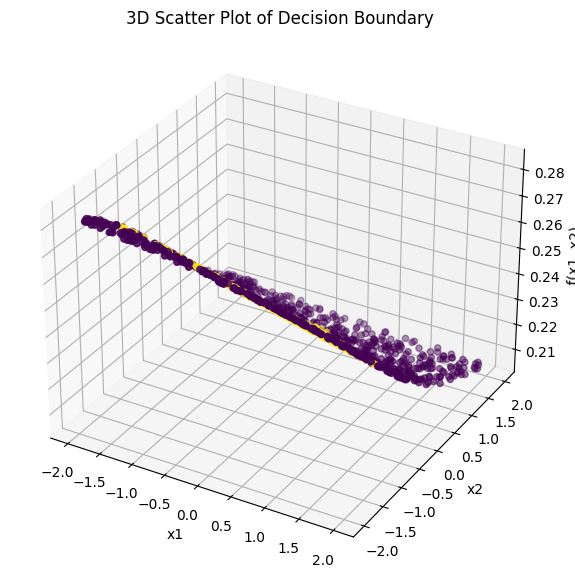

In [43]:
x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
f_grid = np.zeros_like(x1_grid)

for i in range(x1_grid.shape[0]):
    for j in range(x1_grid.shape[1]):
        x_point = np.array([x1_grid[i, j], x2_grid[i, j]])
        f_grid[i, j] = forward_NN(x_point)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], [forward_NN(np.array([X[i, 0], X[i, 1]])) for i in range(len(X))], c=Y, cmap='viridis', marker='o')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('3D Scatter Plot of Decision Boundary')

plt.show()

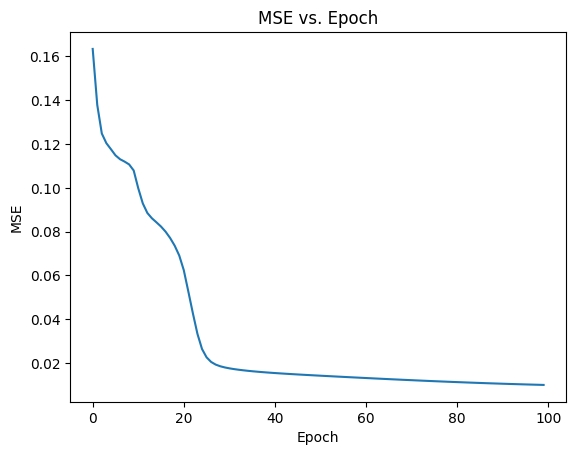

In [44]:
np.random.seed(42)
W = np.random.normal(0, np.sqrt(3), W.shape)
b = np.random.normal(0, np.sqrt(3), b.shape)
U = np.random.normal(0, np.sqrt(3), U.shape)
c = np.random.normal(0, np.sqrt(3), c.shape)

eta = 0.01
epochs = 100
num_data_points = 1000

X = np.random.uniform(-2, 2, size=(1000, 2))
Y = y = run_old_nn(X)

mse_list = []

for epoch in range(epochs):
    for i in range(num_data_points):
        x = X[i]
        y = Y[i]
        
        f, dW, db, dU, dc = full_NN(x, y)

        W -= eta * dW
        b -= eta * db
        U -= eta * dU
        c -= eta * dc
    
    y_preds = np.array([forward_NN(x) for x in X])
    mse_epoch = mse(Y, y_preds)
    mse_list.append(mse_epoch)

plt.plot(range(epochs), mse_list)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Epoch')
plt.show()

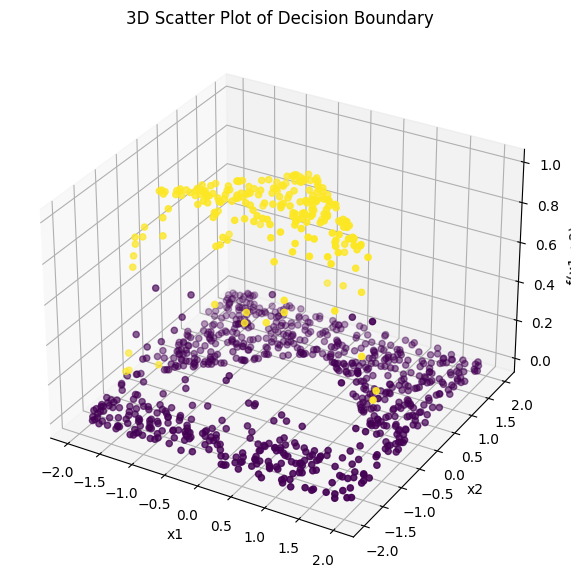

In [45]:
x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
f_grid = np.zeros_like(x1_grid)

for i in range(x1_grid.shape[0]):
    for j in range(x1_grid.shape[1]):
        x_point = np.array([x1_grid[i, j], x2_grid[i, j]])
        f_grid[i, j] = forward_NN(x_point)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], [forward_NN(np.array([X[i, 0], X[i, 1]])) for i in range(len(X))], c=Y, cmap='viridis', marker='o')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('3D Scatter Plot of Decision Boundary')

plt.show()